# Visualização de dados

Teremos uma breve introdução a visualização de dados, passando pelos gráficos mais importantes para que consigamos entender melhor a nossa base. Para isso vamos utilizar duas bibliotecas: matplotlib (em seu modulo pyplot) e seaborn. A primeira é de mais baixo nível enquanto a segunda é uma implementação mais avançada que gera visualizações mais complexas com menos código.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

Lendo a base

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
df.shape

(569, 31)

Essa base é chamada **Breast Cancer Wisconsin**, tendo 569 instâncias e 31 atributos. Cada exemplo da base é uma serie de medidas feitas em tumores, geralmente sendo utilizada na tarefa de classificação deles como malignos ou benignos. Segue uma lista com o significada de cada feature:

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Nosso objetivo vai ser responder algumas perguntas sobre a base utilizando diferentes tipos de visualização

## Histograma

Histograma um gráfico utilizado para visualizar a distribuição dos seus dados, isto é, a frequencia em que cada valor ocorre. Para a visualização histograma podemos usar matplotlib, através da função <mark>plt.hist()</mark> ou usando a <mark>sns.distplot()</mark> do seaborn.

Um histograma divide os valores em **bins** de tamanho igual para a contagem do número de ocorrencia de cada valor.

A partir do formato do histograma é possível ter uma ideia aproximada do tipo de distribuição que a variável possui, como por exemplo gaussiana ou exponencial.

Vamos ver alguns exemplos de uso do histograma no contexto da nossa base...

**Como é a distribuição do raio dos tumores?**



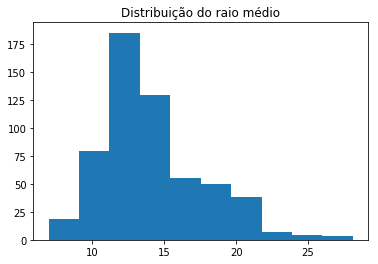

In [29]:
plt.hist(df['mean radius'], bins=10)
# plt.title() adiciona um titulo ao grafico
plt.title('Distribuição do raio médio') 
plt.show()

**Bins** de um histograma indica o número de "caixas" que os dados vão ser divididos para a contagem da frequencia.

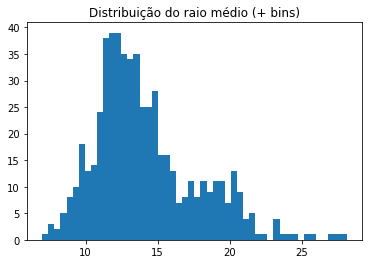

In [7]:
plt.hist(df['mean radius'], bins=50)
plt.title('Distribuição do raio médio (+ bins)') 
plt.show()

Text(0.5,1,'Distribuição do raio médio (seaborn)')

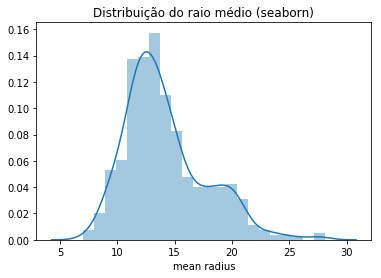

In [8]:
sns.distplot(df['mean radius'])
plt.title('Distribuição do raio médio (seaborn)') 

Como é possivel ver com o gráfico fica mais bonito e ainda é adicionada uma aproximação continua da distribuição.

**A distribuição dos raios é igual para tumores benignos e malignos?**

Para responder essa pergunta podemos plotar ambas as distribuições em um mesmo gráfico (Iremos usar o seaborn, mas com o matplotlib ficaria da mesma forma)

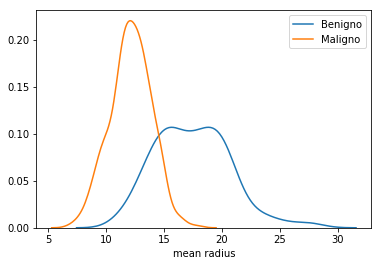

In [28]:
# Hist=False deixa os gráfico menos poluido
sns.distplot(df[df['target'] == 0]['mean radius'], hist=False, label='Benigno') 
sns.distplot(df[df['target'] == 1]['mean radius'], hist=False, label='Maligno') 

## Boxplot

Boxplot é outro tipo de gráfico que serbve para vermos a distribuição dos dados, porém fazendo uso dos **quartis** da variável analisada. O boxplot possui uma caixa, que indica os quartis 1, 2 e 3, duas retas que representam os dados dentro do intervalo (Q1−1.5⋅IQR,Q3+1.5⋅IQR), onde IQR = Q3 = Q1 é o intervalo interquartil.

Para utilizar o boxplot podemos usar a função <mark>plt.boxplot()</mark>, do matplotlib, ou a <mark>sns.boxplot()</mark> do seaborn.

Vamos analisar alguma variáveis da nossa base...

**Como está distribuida a textura média? Existem muitos valores discrepantes?**

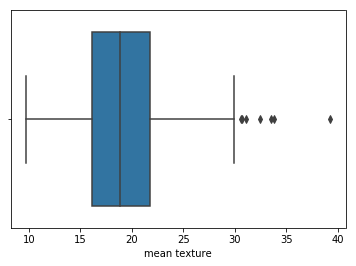

In [10]:
sns.boxplot(df['mean texture']);

Essa variável possui alguns outliers, mas não muitos

**Existe uma diferença na distribuição da área dos tumores malignos e benignos?**

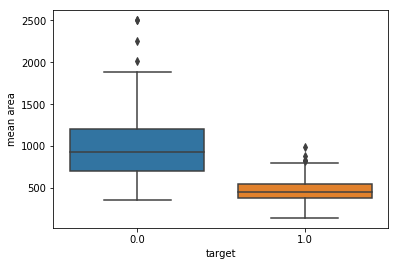

In [11]:
sns.boxplot(x='target',y='mean area', data=df)

Podemos ver que as distribuições são bem diferentes para tipos diferentes de tumores.

## Barplot

Barplot, ou gráfico de barras, é um tipo de gráfico que já estamos muito acostumados. Ele simplesmente relaciona categorias com algum tipo de valor, como por exemplo uma contagem ou uma porcentagem.

Podemos fazer um gráfico de barras utilizado a função <mark>plt.bar()</mark> do matplotlib ou com a função <mark>sns.barplot()</mark> do seaborn.

Vamos usar esse conceito para descobrir uma coisa importante sobre nossa base...

**Quantos exemplos da base são malignos e quantos são benignos?**

In [12]:
# Função value_counts() do Pandas conta a frequencia de cada valor distinto na Series
contagem = df['target'].value_counts()
contagem

1.0    357
0.0    212
Name: target, dtype: int64

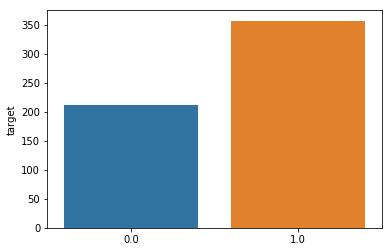

In [13]:
# Primeiro atributo são as categorias e o segundo os valores
sns.barplot(contagem.index, contagem)

**Pergunta: **Qual o problema que esse número de exemplos de cada classe pode causar pensando na avaliação do nosso modelo?

O seaborn já tem uma função que realiza a contagem e criar o barplot de uma vez só. Mas perceba que em alguns momentos não queremos só a contagem, então temos que gerar a Series como fizemos antes

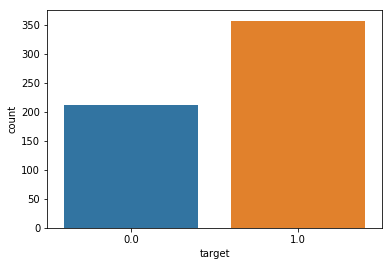

In [14]:
# Faz a contagem e o barplot de uma só vez
sns.countplot(df['target'])

## Scatter plot

Scatter plot é um tipo de gráfico que mostra a relação entre duas variáveis. O que ele faz é pegar o par ordenado (variavel_1, variavel_2) e a colocar no gráfico, dessa forma conseguimos ver se existe alguma tendencia envolvendo as duas variáveis.

Para usa-lo podemos utilizar a função <mark>plt.scatter()</mark> do matplotlib ou a <mark>sns.scatterplot()</mark> do seaborn.

Agora vamos analisar a relação entre as variáveis da nossa base...

**Qual é a relação esperada entre o raio do tumor e seu perímetro? E com sua área?**

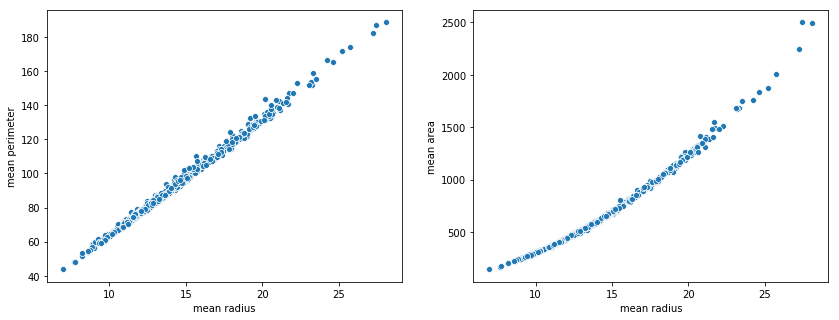

In [15]:
# Essa função cria um grid de eixos, e podemos passar esses eixos para o seaborn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.scatterplot(df['mean radius'], df['mean perimeter'], ax=axes[0])
sns.scatterplot(df['mean radius'], df['mean area'], ax=axes[1])

**Existe algum tipo de relação entre o raio e simetria do tumor?**

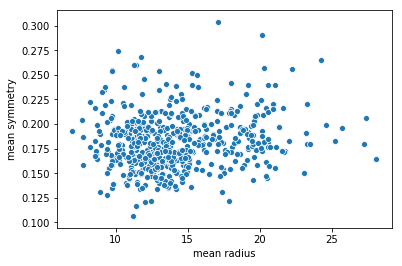

In [16]:
sns.scatterplot(df['mean radius'], df['mean symmetry'])

Aparentemente não temos nenhuma grande tendencia nesse par de variáveis

**Considerando a relação entre o raio e textura como o target se comporta?**

Podemos separar em cores diferentes targets diferentes usando o parâmetro <mark>hue</mark>

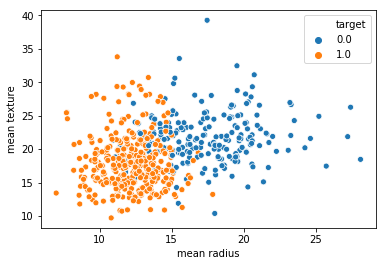

In [17]:
sns.scatterplot(df['mean radius'], df['mean texture'], hue=df['target'])

Podemos ver que aparentemente raio pequeno e pouca textura indicam que o tumor é benigno

### Pairplot
Mas será que temos que olhar manualmente cada par para ver se achamos relações entre eles? O seaborn tem uma função que já faz isso automaticamente <mark>sns.pairplot()</mark>. É bom perceber que daria para fazer a mesma coisa com o matplotlib usando um laço e a função plt.subplots() que acabamos de ver!

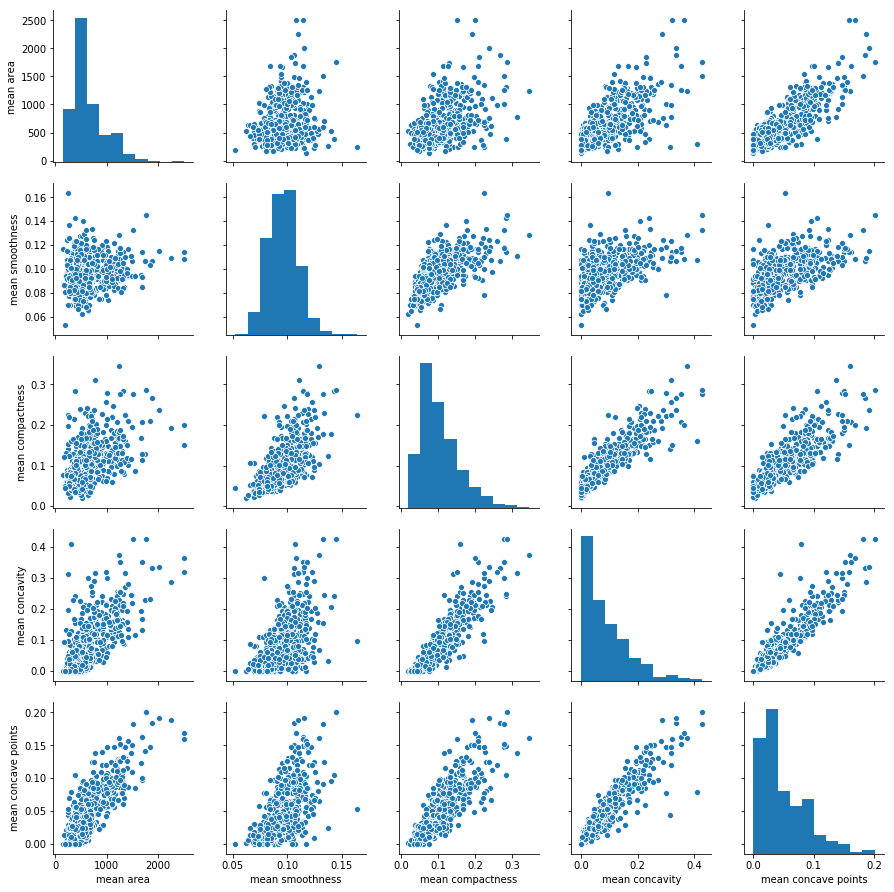

In [18]:
# Vamos usar só um subconjunto das colunas para podermos ver melhor
df_5columns = df.iloc[:, 3:8]
sns.pairplot(df_5columns)

É possível ver, por exemplo, uma relação linear entre a compactação e a concavidade.

## Correlação (Heatmap)

Correlação de Pearson é uma medida estatística que indica o quão fortemente duas variáveis estão realcionadas. Sua formula é a seguinte. Seus valores variam entre -1 e 1, onde 1 é diretamente proporcional, 0 é sem relação e -1 é inversamente proporcional.

A função utilizada para obter a matriz de correlação entre as variáveis é a <mark>corr()</mark>, do próprio Pandas. Mas como uma matriz de números com dimensão (n_features, n_features) é ruim de visualizar esses dados são normalmente exibidos usando a função <mark>sns.heatmap()</mark>

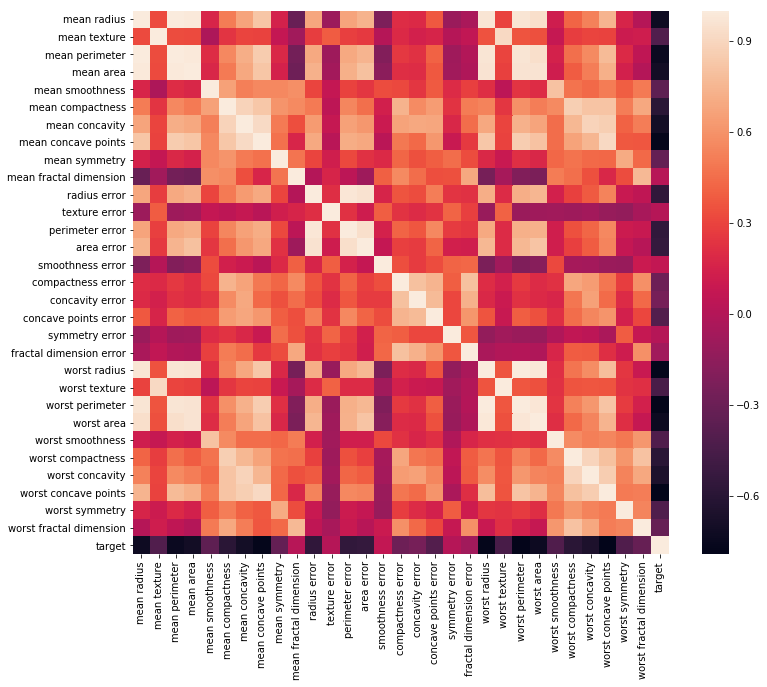

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

** Pergunta: ** Por que a diagonal se comporta dessa forma?

Vamos utilizar aquelas 5 colunas que separamos para o pairplot() e ver a correlação entre elas

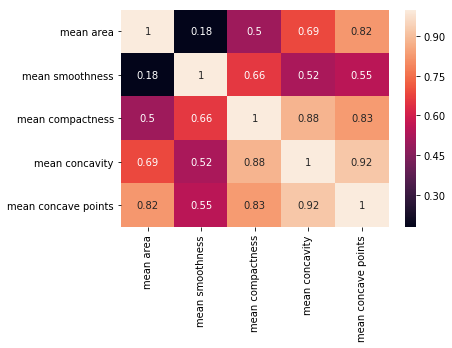

In [20]:
# Parametro annot adiciona o valor dentro dos elementos da matriz
sns.heatmap(df_5columns.corr(), annot=True)

De fato a concavidade e a compactação do tumor possuem uma forte ralação uma com a outra

***

É isso, gente! Nos slides da aula temos alguns links com materiais para quem quiser se aprofundar nos temas que passamos hoje. Também recomendo que façam o exercícios que passamos, a melhor maneira de aprender essas ferrementas é treinando. Até a proxima aula!

![Fim](https://vigilianerd.com.br/wp-content/uploads/2019/02/capita_marvel_vigilianerd_2.gif, 'fim') 